In [1]:
# SVR Hyper Parameter Tuning
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston_p = load_boston()
x = boston_p.data
y = boston_p.target

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [7]:
parameters = {'kernel':['rbf', 'linear'], 'gamma':[1, 0.1, 0.01]}

In [8]:
grid = GridSearchCV(SVR(), parameters, refit=True, verbose=2, scoring='neg_mean_squared_error')

In [9]:
grid.fit(x, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=1, kernel=linear; total time=   6.4s
[CV] END .............................gamma=1, kernel=linear; total time=   6.0s
[CV] END .............................gamma=1, kernel=linear; total time=   9.9s
[CV] END .............................gamma=1, kernel=linear; total time=  10.1s
[CV] END .............................gamma=1, kernel=linear; total time=   5.8s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [10]:
best_params = grid.best_params_

In [11]:
# KNN Hyper Parameter Tuning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
x = iris.data
y = iris.target

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=22, shuffle=True, stratify=y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
kNN_accuracy_test = []
for k in range(1, 50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    kNN.fit(x_train, y_train)
    kNN_accuracy_test.append(kNN.score(x_test, y_test))

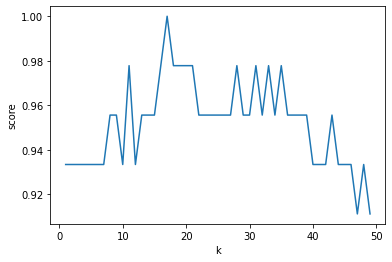

In [25]:
plt.plot(np.arange(1, 50), kNN_accuracy_test, label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [27]:
# Overfitting and Underfitting
kNN_accuracy_train = []
kNN_accuracy_test = []

for k in range(1, 50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    kNN.fit(x_train, y_train)
    kNN_accuracy_train.append(kNN.score(x_train, y_train))
    kNN_accuracy_test.append( kNN.score(x_test, y_test))

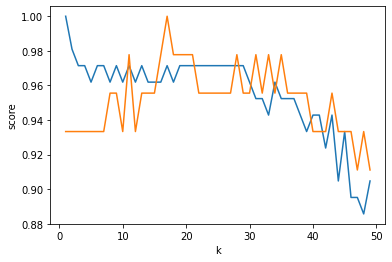

In [28]:
plt.plot(np.arange(1, 50), kNN_accuracy_train, label='train')
plt.plot(np.arange(1, 50), kNN_accuracy_test, label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.show()